In [3]:
import skimage

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os 
from pdf2image import convert_from_bytes, convert_from_path
from PIL import Image
#import pytesseract
from pdf2image import convert_from_path
import matplotlib.image as mpimg
import re
import pandas as pd

In [ ]:
path=r'Factures_PDF'  
listelem=[]
listePDF=[]
files=os.listdir(path)

for name in files:
    listelem.append(name)
    
for i in range(0,len(listelem),1):
    if listelem[i][-4:]=='.pdf':
        a=listelem[i]
        listePDF.append(a)
  
pdf = []
n = 1
for i in listePDF:
    imgs = convert_from_path(path+'/'+i, 500, use_pdftocairo=True, strict=False)
    pdf.append(imgs)
    
    for img in imgs :
        for j in range(len(imgs)):
            jpg = img.save('JPG/'+str(i)+'_Page '+str(j+1)+'.jpg', 'JPEG')

listeJPG = []
path=r'out/JPG'
listelem2=[]

files=os.listdir(path)

for name in files:
    listelem2.append(name)
    
for i in range(0,len(listelem2),1):
    if listelem2[i][-4:]=='.jpg':
        a=listelem2[i]
        listeJPG.append(a)

In [ ]:
path=r'JPG/JPG_GRIS'

os.listdir(path)

def get_grayscale(image):

    imgG = mpimg.imread('JPG/'+image,0)
    imgGray = cv2.cvtColor(imgG, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('JPG/JPG_GRIS/'+image, imgGray)
    #plt.imshow(imgGray, cmap = "gray")
    #plt.savefig('JPG/JPG_GRIS/'+image)
    #plt.show

#boucle pour appliquer le gris sur toutes les images
for i in range(len(listeJPG)):
    image_path = listeJPG[i]

    get_grayscale(image_path)

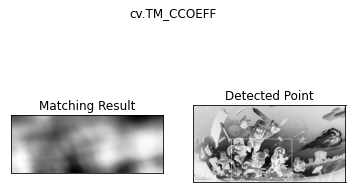

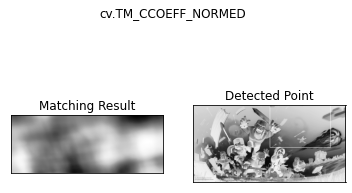

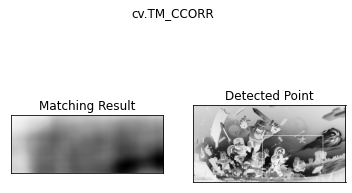

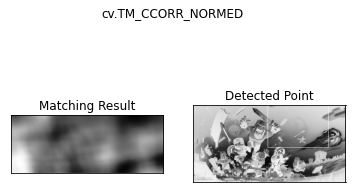

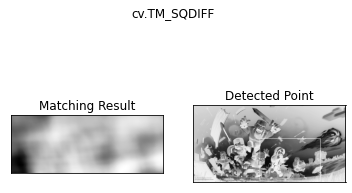

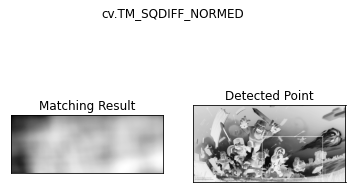

In [25]:
path=r'JPG/JPG_GRIS'

img = cv.imread (path+ '/clash.jpg' ,0)
img2 = img.copy()
template = cv.imread(path+'/dell.jpg',0)
w, h = template.shape[::-1]
# Toutes les 6 méthodes de comparaison dans une liste
methods = [ 'cv.TM_CCOEFF' , 'cv.TM_CCOEFF_NORMED' , 'cv.TM_CCORR' ,
            'cv.TM_CCORR_NORMED' , 'cv.TM_SQDIFF' , 'cv.TM_SQDIFF_NORMED' ]
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # if the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, (0,255,0) , 2)
    plt.subplot(121),plt.imshow(res,cmap = 'Greys')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'Greys')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()